In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(data=iris.data,columns=iris.feature_names)
y = iris.target

In [2]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame (optional)
X = pd.DataFrame(X_scaled, columns=iris.feature_names)

In [8]:
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.cluster import OPTICS
from sklearn.metrics import accuracy_score

eps_values = [i/10 for i in range(1, 25, 1)]
min_samples_values = [i for i in range(3, 15, 1)]
metric_values = ['euclidean']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']
p_values = [i for i in range(2,6,1)]
cluster_method_values = ['xi','dbscan']
split_values = [i/100 for i in range(10,55,5)]

best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
best_pred_y = 0
best_test_y = 0

for eps,min_samples,metric,algorithm,p, cluster_method, split in product(eps_values,min_samples_values,metric_values,algorithm_values,p_values,cluster_method_values, split_values):

    train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=None,test_size=split)
    model = OPTICS(eps=eps,min_samples=min_samples,metric=metric,algorithm=algorithm,p=p,cluster_method=cluster_method)
    model.fit(train_X,train_y)
    pred_y = model.fit_predict(test_X)
    score = accuracy_score(test_y,pred_y)

    if score > best_score:
        best_score = score
        best_train_test_ratio = split
        best_model = model
        best_param_list = [eps,min_samples,metric,algorithm,p,split]
        best_pred_y = pred_y
        best_test_y = test_y



In [9]:
print(best_score)
print(best_param_list)
print(best_train_test_ratio)
print(best_model.components_)

0.9473684210526315
[0.4, 7, 'euclidean', 'auto', 2, 0.25]
0.25


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

Confusion Matrix: 

[[14  0  0]
 [ 0 11  1]
 [ 0  1 11]]




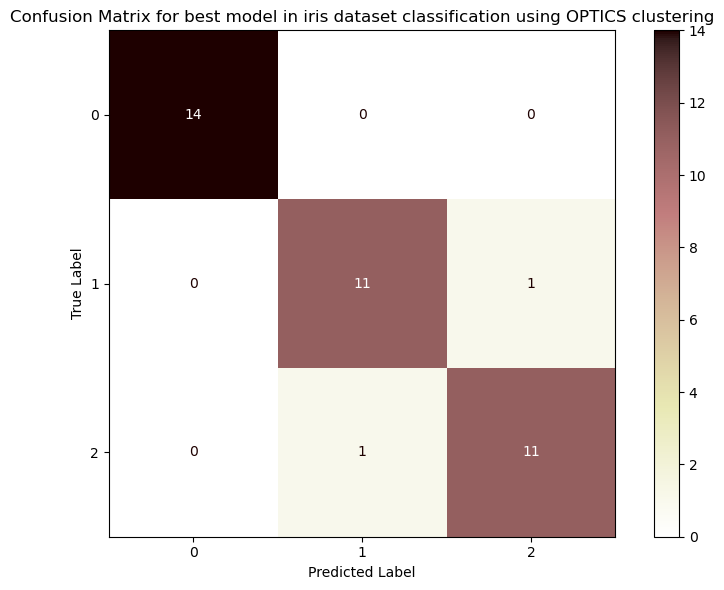

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(best_test_y, best_pred_y)
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in iris dataset classification using OPTICS clustering')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()

In [11]:
from sklearn import metrics

rand_index = metrics.rand_score(best_test_y, best_pred_y)
adjusted_rand_index = metrics.adjusted_rand_score(best_test_y, best_pred_y)

# Mutual Information and Adjusted Mutual Information
mutual_info = metrics.mutual_info_score(best_test_y, best_pred_y)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(best_test_y, best_pred_y)
normalized_mutual_info = metrics.normalized_mutual_info_score(best_test_y, best_pred_y)

# Silhouette Coefficient, Calinski-Harabasz Index, and Davies-Bouldin Index
silhouette_coefficient = metrics.silhouette_score(X, y)
calinski_harabasz_index = metrics.calinski_harabasz_score(X, y)
davies_bouldin_index = metrics.davies_bouldin_score(X, y)

print("Rand Index:", rand_index)
print("Adjusted Rand Index:", adjusted_rand_index)
print("Mutual Information:", mutual_info)
print("Adjusted Mutual Information:", adjusted_mutual_info)
print("Normalized Mutual Information:", normalized_mutual_info)
print("Silhouette Coefficient:", silhouette_coefficient)
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)

Rand Index: 0.9374110953058321
Adjusted Rand Index: 0.8555119581464873
Mutual Information: 0.9147275859665572
Adjusted Mutual Information: 0.82558357381189
Normalized Mutual Information: 0.8346914027145727
Silhouette Coefficient: 0.3811261580543803
Calinski-Harabasz Index: 191.30360862698998
Davies-Bouldin Index: 1.067257040548008
